In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Conjunto de dados que será usado
df = sns.load_dataset('tips')
X = df[['total_bill', 'tip']].copy()

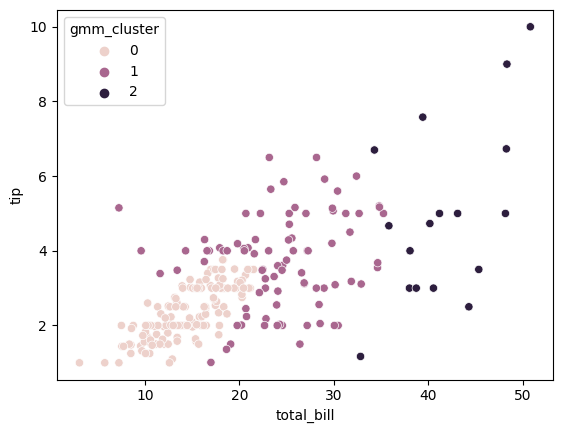

In [40]:
# buscar os clusters que cobrem o maior número de dados (n_components)

gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
prediction_gmm = gmm.predict(X)

# Adcionar predições para os clusters
df['gmm_cluster'] = prediction_gmm
#Plotar o GMM
sns.scatterplot(data=df, y='tip', x='total_bill', hue='gmm_cluster');

In [43]:
# tranformando a variável de interesse um array
X = np.array(X['total_bill'])

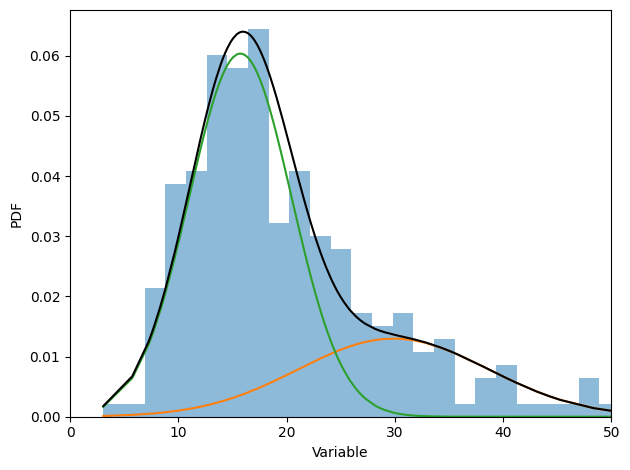

In [45]:
#o algoritmo busca a distrbuição normal que melhor descreva cada cluster

gmm = GaussianMixture(n_components = 2).fit(X.reshape(-1, 1))

plt.figure()
plt.hist(X, bins=25, histtype='stepfilled', density=True, alpha=0.5)
plt.xlim(0, 50)
f_axis = X.copy().ravel()
f_axis.sort()
a = []
for weight, mean, covar in zip(gmm.weights_, gmm.means_, gmm.covariances_):
    a.append(weight*norm.pdf(f_axis, mean, np.sqrt(covar)).ravel())
    plt.plot(f_axis, a[-1])
plt.plot(f_axis, np.array(a).sum(axis =0), 'k-')
plt.xlabel('Variable')
plt.ylabel('PDF')
plt.tight_layout()
plt.show()